<a href="https://colab.research.google.com/github/AnthonySanchez150/CECS456-Project/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Description
This data set includes 201 instances of one class and 85 instances of another class. The instances are described by 9 attributes, some of which are linear, and some are nominal.
Tasks:
Predict if the patient has breast cancer or not (binary classification problem)
Instructions/Directions:
1.	Perform exploratory data analysis and feature selection 	
2.	Visualization
            2.1. Plot the variable distribution using box plot, histogram, and provide a summary of your understanding.  
            2.2. Provide an insight on the outcome of correlation matrix   
3.	Perform feature extraction using Principal Component Analysis (PCA). 
4.	Plot the confusion matrix. 
5.	Evaluate the performance metrics of logistic regression, SVM classifier, Naïve Bayes classifier, and Random Forest classifier.  
6.	Plot the relevant graphs, for example ROC, AUC, etc. 
7.	Use Artificial Neural Network (Deep Learning Method) and compare the accuracy with traditional Machine Learning Models. Write down your observations.
Dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer
'

## Breast Cancer Prediction

CECS 456 - Machine Learning

Group #9:
- Phong Cao (Leader)
- Peter Pham
- Jeremy Lin
- Maximillian Gutierrez
- Anthony Sanchez
- John Messina

Due Date: 4-26-23

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Exploratory Data Analysis

In [68]:
dataset = pd.read_csv('breast-cancer.data')

X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

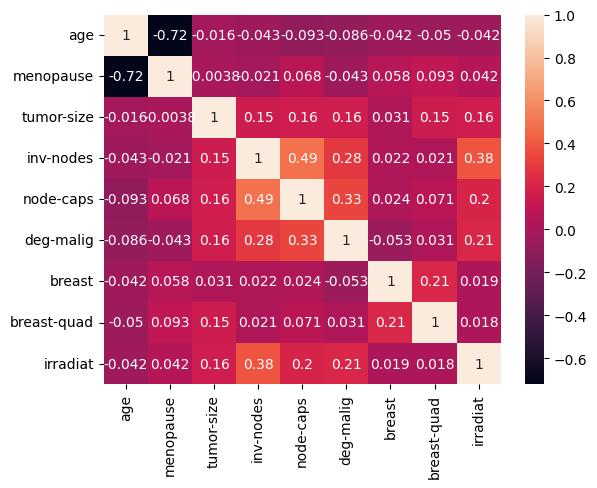

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder()
dataset['age'] = le.fit_transform(dataset['age'])
#dataset['class'] = le.fit_transform(dataset['class'])
dataset['menopause'] = le.fit_transform(dataset['menopause'])
dataset['tumor-size'] = le.fit_transform(dataset['tumor-size'])
dataset['inv-nodes'] = le.fit_transform(dataset['inv-nodes'])
#dataset['deg-malig'] = le.fit_transform(dataset['deg-malig'])
dataset['breast'] = le.fit_transform(dataset['breast'])
dataset['breast-quad'] = le.fit_transform(dataset['breast-quad'])
dataset['irradiat'] = le.fit_transform(dataset['irradiat'])
dataset['node-caps'] = le.fit_transform(dataset['node-caps'])

import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix = dataset.corr(numeric_only = True)
sn.heatmap(corr_matrix, annot=True)
plt.show()

dataset['class'] = le.fit_transform(dataset['class'])

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values="?", strategy="most_frequent")
si.fit(X[:,5:9])
X[:,5:9] = si.transform(X[:,5:9])

le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
#X[:,1] = le.fit_transform(X[:,1])
X[:,2] = le.fit_transform(X[:,2])
X[:,3] = le.fit_transform(X[:,3])
X[:,4] = le.fit_transform(X[:,4])
X[:,6] = le.fit_transform(X[:,6])
X[:,7] = le.fit_transform(X[:,7])
X[:,8] = le.fit_transform(X[:,8])
y = le.fit_transform(y)

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
X = np.array(ct.fit_transform(X))

print(X)
print(y)

[[0.0 0.0 1.0 ... 0 1 0]
 [0.0 0.0 1.0 ... 1 4 0]
 [0.0 0.0 1.0 ... 0 1 0]
 ...
 [1.0 0.0 0.0 ... 1 2 0]
 [1.0 0.0 0.0 ... 0 1 0]
 [1.0 0.0 0.0 ... 0 1 0]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [71]:
# print(dataset)

print(dataset['tumor-size'])

0      5
1      3
2      3
3      2
4      0
      ..
281    5
282    3
283    3
284    5
285    5
Name: tumor-size, Length: 286, dtype: int64


Text(0.5, 0, 'Age')

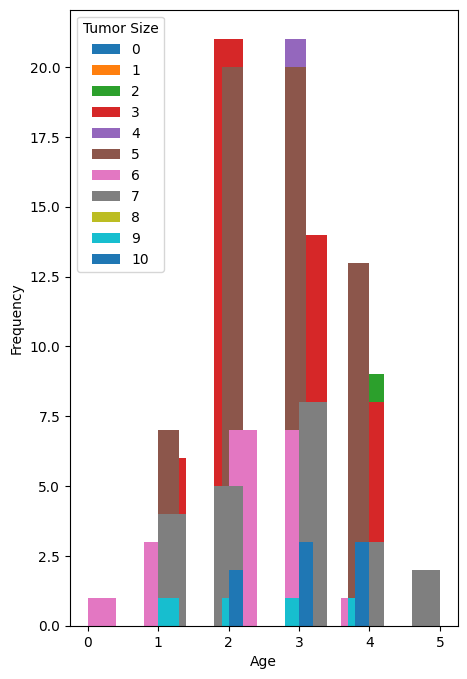

In [72]:
df = dataset.groupby('tumor-size')['age'].plot(kind='hist', figsize=(5, 8))

plt.legend(title='Tumor Size')
# Add x-axis label
plt.xlabel('Age')



Text(0.5, 0, 'Class')

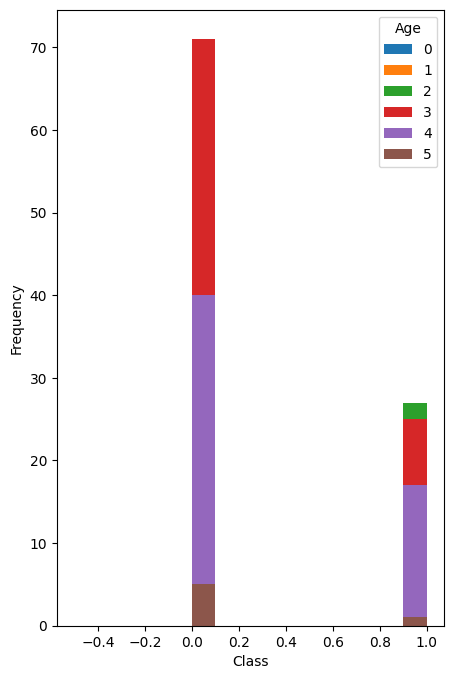

In [73]:
df = dataset.groupby('age')['class'].plot(kind='hist', figsize=(5, 8))

plt.legend(title='Age')
# Add x-axis label
plt.xlabel('Class')


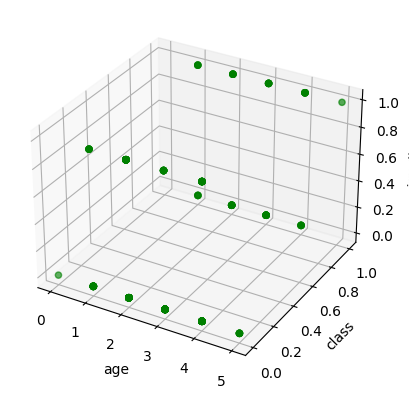

In [74]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(dataset["age"], dataset["class"],dataset["irradiat"], color = "green")
ax.set_xlabel('age')
ax.set_ylabel('class')
ax.set_zlabel('irradiat')
#plt.plot(dataset["age"], dataset["class"],dataset["irradiat"], "ro")
plt.show()

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train)

[[-0.91581094 -0.13363062  0.9486833  ...  1.08232554 -0.73036435
  -0.56384313]
 [-0.91581094 -0.13363062  0.9486833  ... -0.92393644 -0.73036435
   1.77354294]
 [ 1.09192843 -0.13363062 -1.05409255 ...  1.08232554 -0.73036435
  -0.56384313]
 ...
 [ 1.09192843 -0.13363062 -1.05409255 ... -0.92393644  0.21044397
  -0.56384313]
 [-0.91581094 -0.13363062  0.9486833  ...  1.08232554  0.21044397
  -0.56384313]
 [ 1.09192843 -0.13363062 -1.05409255 ...  1.08232554  2.09206061
  -0.56384313]]


## Principle Componenet Analysis
used different n/k values and decided on n = 9 as it provided the best results.

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# n = 1, 0.6551724137931034
# n = 2, 0.6724137931034483
# n = 3, 0.6724137931034483
# n = 4, 0.6379310344827587
# n = 5, 0.6551724137931034
# n = 6, 0.6379310344827587
# n = 7, 0.6551724137931034
# n = 8, 0.6551724137931034
# n = 9, 0.6896551724137931
# n = 10, 0.6896551724137931
# n = 11, 0.6896551724137931
# using n_components=9 gives us the best accuracy

## Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

print(cm)
accuracy_score(y_test,y_pred)

[[35  3]
 [15  5]]


0.6896551724137931

## Support Vector Machine
implimented two differen kernel techniques, linear and radial basis function(rbf). RBF provided better results in regard to accuracy score.

In [79]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

print(cm)
accuracy_score(y_test,y_pred)


[[34  4]
 [14  6]]


0.6896551724137931

In [80]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

print(cm)
accuracy_score(y_test,y_pred)


[[37  1]
 [15  5]]


0.7241379310344828

## Naive Bayes Classifier
Implimented gaussian and bernoulli NB classifier. Bernoulli performed better given that gaussian works best with gaussian distributed datasets which this isnt.

In [81]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

print(cm)
accuracy_score(y_test,y_pred)


[[31  7]
 [15  5]]


0.6206896551724138

In [82]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

y_pred = bnb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

print(cm)
accuracy_score(y_test,y_pred)

[[35  3]
 [11  9]]


0.7586206896551724

##Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

print(cm)
accuracy_score(y_test,y_pred)

[[34  4]
 [11  9]]


0.7413793103448276

##ANN
artificial neural network with 3 layers. first layer with 32 units, second layer with 16 units and an output layer with 1 unit. Trained with 200 epoch, batch size 64. This provided more consistant results than other combinations we tried.

In [84]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=32, activation="relu"))
ann.add(tf.keras.layers.Dense(units=16, activation="relu"))
#ann.add(tf.keras.layers.Dense(units=9, activation="relu"))
#ann.add(tf.keras.layers.Dense(units=12, activation="relu"))
#ann.add(tf.keras.layers.Dense(units=12, activation="relu"))
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
ann.compile(optimizer="adam",loss='binary_crossentropy',metrics=["accuracy"])
ann.fit(X_train, y_train, epochs=200, batch_size=64)


y_pred = ann.predict(X_test)
y_pred = (y_pred>0.5)
cm = confusion_matrix(y_test,y_pred)

print(cm)
accuracy_score(y_test,y_pred)

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 0.7977 - accuracy: 0.3904
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7620 - accuracy: 0.4123
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7303 - accuracy: 0.4561
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7044 - accuracy: 0.5482
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5833
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6616 - accuracy: 0.6272
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6455 - accuracy: 0.6667
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6308 - accuracy: 0.6930
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6189 - accuracy: 0.7061
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6091 - accuracy: 0.7018
Epoch 11/200
4/4 [===========

0.7241379310344828